https://online.stat.psu.edu/stat501/lesson/2

#### This lesson presents two alternative methods for testing whether a linear association exists between the predictor x and the resposne y in the SLR model. One of the t-test for the slope; the other is an analysis of variance (ANOVA) F-test

#### We also learn a way to check for linearity: the linear lack of fit test (Skip)

In [1]:
import os
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import Image
from statsmodels.formula.api import ols
import scipy.stats

In [2]:
filedir = 'STAT501_Lesson02'

In [3]:
os.listdir(filedir)

['mortality_latitude.png',
 'couplesheights.txt',
 'leadcord.txt',
 '.DS_Store',
 'signdist.txt',
 'skincancer.txt',
 'newaccounts.txt',
 'whitespruce.txt',
 'mens200m.txt',
 'heightgpa.txt',
 'ssr_sse.png',
 'gpa_height.png',
 'handheight.txt',
 'husbandwife.txt',
 'solutions_conc.txt']

#### 1. inference

In [4]:
df = pd.read_table(os.path.join(filedir, 'skincancer.txt'))
df

,State,Lat,Mort,Ocean,Long
0,Alabama,33.0,219,1,87.0
1,Arizona,34.5,160,0,112.0
2,Arkansas,35.0,170,0,92.5
3,California,37.5,182,1,119.5
4,Colorado,39.0,149,0,105.5
5,Connecticut,41.8,159,1,72.8
6,Delaware,39.0,200,1,75.5
7,"Wash,D.C.",39.0,177,0,77.0
8,Florida,28.0,197,1,82.0
9,Georgia,33.0,214,1,83.5


In [5]:
y = df['Mort']
X = df[['Lat']]
X = sm.add_constant(X)
sm.OLS(y, X).fit().summary()

/Users/yuehuazhuang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Mort   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     99.80
Date:                Tue, 21 Jun 2022   Prob (F-statistic):           3.31e-13
Time:                        21:45:49   Log-Likelihood:                -213.08
No. Observations:                  49   AIC:                             430.2
Df Residuals:                      47   BIC:                             433.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        389.1894     23.812     16.344      0.000     341.285     437.094
Lat           -5.9776      0.598     -9.990      0.000      -7.181      -4.774
==============================================================================
Omnibus:                        0.740   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.691   Jarque-Bera (JB):                0.773
Skew:                           0.094   Prob(JB):                        0.679
Kurtosis:                       2.414   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

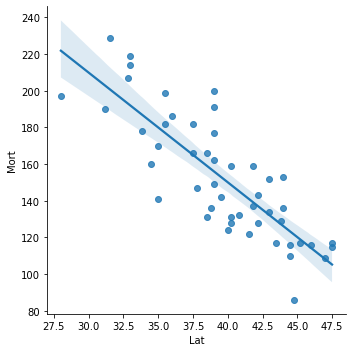

In [6]:
sns.lmplot(x='Lat',y='Mort',data=df,fit_reg=True)

Null hypothesis: $\beta_1$ = some number $\beta$
$$
t^* = \frac{b_1 - \beta}{\frac{\sqrt{MSE}}{\sqrt{\sum(x_i-\bar{x})^2}}}
$$

In [7]:
df['intercept'] = 1
model = ols('Mort ~ intercept + Lat', data=df).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
intercept,1.0,1.306122,1.306122,0.003575,9.525777e-01
Lat,1.0,37169.256618,37169.256618,101.726457,2.427884e-13
Residual,47.0,17173.065103,365.384364,NaN,NaN


In [8]:
np.var(df['Lat'])

20.826280716368178

In [9]:
np.sqrt(365.384364 / (20.826280716368178 * len(df)))

0.5983717480944304

#### Factors affecting the width of a confidence interval

$$
b_1 - t \frac{\sqrt{MSE}}{\sqrt{\sum(x_i - \bar{x})^2}}
$$

(1) confidence level

(2) MSE = total - explanation

(3) the more spread out the predictor x values

(4) the sample size

#### Now you can get the idea of t test

#### Let's talk about ANOVA F test

In [10]:
Image(url=os.path.join(filedir, "mortality_latitude.png"), width=600, height=600)

We have illustrated that the total variation (53637) is the sum of two parts - variation "due to" latitude (36464) and variation just due to random error (17173)

In [11]:
Image(url=os.path.join(filedir, "gpa_height.png"), width=600, height=600)

Here the total variation is 9.7331; only 0.0276 can be explained by our model. Very little of the variation can be attributed to the predictor height.

In [12]:
Image(url=os.path.join(filedir, "ssr_sse.png"), width=600, height=600)

$$MSR = \frac{SSR}{1}$$<br> 
$$MSE = \frac{SSE}{n-2}$$

Imagine taking many, many random samples of size n from a population, and estimating the regression line and determining MSR and MSE for each data set obtained.
$$
E[MSR] = \sigma^2 + \beta_1^2 \sum_{i=1}^n (X_i - \bar{X})^2
$$
$$
E[MSE] = \sigma^2
$$

It suggests how to test $\beta_1=0$<br>
If $\beta_0=0$, then we'd expect the ratio MSR/MSE to equal 1

F test with df (1, n-2)

#### In the simple LR, F test and t test are equivalent. The F-test is more useful for the multiple regression model when we want to test that more than one slope parameter is 0.